In [115]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

In [116]:
pd.set_option("display.max_columns", None)
pd.set_option("io.excel.xls.writer", "xlwt")
df = pd.read_pickle('~/Downloads/responses_latest.pkl')
df = df[(df['survey_short_id'] == 15) & (df['has_valid_response'] == True)]

cleanup_fields = ['scale_score', 'analysis_group', 'choice']
df[cleanup_fields] = df[cleanup_fields].fillna(0).astype(int)

# A bit more cleanup
# Not doing audio for the moment
df = df[df.response_type != 'AU']

#Cols to drop
df = df.drop(['added', 'updated', 'question_number', 'text', 'transcription_status', 'filename', 'transcription_text',
              'language_code', 'language_code_short', 'language_confidence', 'transcription_confidence', 'survey',
              'active', 'redis_job_id', 'analysis_group', 'sentiment_result', 'has_dependents',
              'has_valid_response', 'survey_short_id'], axis=1)

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.


In [117]:
## Reorganise the responses to have respondent_id as index, not response

reshaping = (('CH','choice_text'),('SC','scale_score'))
df_new = pd.DataFrame()
new_dfs = []
for s in reshaping:
    df_work = df.loc[df['response_type']==s[0]]
    df_work = df_work.pivot(index='respondent_id',columns=('question_sort_order', 'question_text'), values=[s[1]])
    
    new_dfs.append(df_work)

df_new = pd.concat(new_dfs, axis=1)
df_new = df_new.droplevel(level=0, axis=1) 


#Get schema for questions
schema_df = df_new.columns.to_frame(index=False).set_index('question_sort_order')
schema_df.sort_index(inplace=True)

df_new = df_new.droplevel(level=1, axis=1)
schema_df

,question_text
question_sort_order,
10,"Zum Start, ein paar demografische Fragen.Bist du:"
20,Dein Alter?
30,Dein Familienstand?
40,Deine berufliche Situation?
44,Nun geht es um das Thema Covid Impfung.Wie ist...
50,Ab hier geht's um Deine Motivationen. Ich geni...
60,"Ich lege großen Wert darauf, dass andere mich ..."
70,Ich fühle mich sehr wohl auf Familienfesten.
80,"Ich genieße es, mich in komplexe Sachverhalte ..."


In [118]:
df_new[10].value_counts()

Weiblich    101
Männlich     67
Divers        6
Name: 10, dtype: int64

In [119]:
df_new[20].value_counts()

56 - 65 J     45
46 - 55 J     44
31 - 45 J     39
20-30 J       27
über 65 J      8
unter 20 J     2
Name: 20, dtype: int64

In [120]:
df_new[30].value_counts()

Paar                  59
Paar mit Kindern      59
Single                38
Single mit Kindern    11
Name: 30, dtype: int64

In [121]:
df_new[40].value_counts()

Angestellt             63
Selbstständig          47
Öffentlicher Dienst    25
Studierend             24
In Ausbildung           6
Name: 40, dtype: int64

In [122]:
df_new[44].value_counts()

Ich bin schon länger geimpft                            123
Ich bin nicht geimpft                                    20
Ich habe mich vor kurzem impfen lassen                   17
Ich bin genesen und geimpft (oder lasse mich impfen)      6
Ich bin genesen und lasse mich nicht impfen               1
Name: 44, dtype: int64

In [123]:
res0 = df_new[44].value_counts(normalize=True)
res0

Ich bin schon länger geimpft                            0.736527
Ich bin nicht geimpft                                   0.119760
Ich habe mich vor kurzem impfen lassen                  0.101796
Ich bin genesen und geimpft (oder lasse mich impfen)    0.035928
Ich bin genesen und lasse mich nicht impfen             0.005988
Name: 44, dtype: float64

<AxesSubplot:title={'center':'Impfstatus Allgemein'}, ylabel='44'>

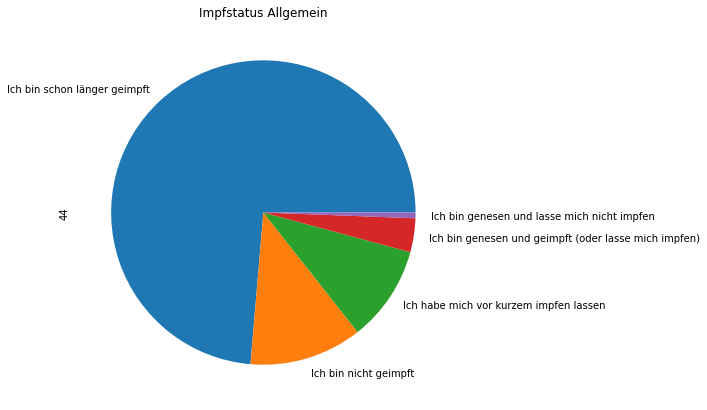

In [124]:
res0.plot(kind='pie', figsize=(18, 7), title='Impfstatus Allgemein')

In [125]:
res1 = df_new.groupby([10])[44].value_counts(normalize=True)
res1

10        44                                                  
Divers    Ich bin nicht geimpft                                   0.600000
          Ich bin schon länger geimpft                            0.200000
          Ich habe mich vor kurzem impfen lassen                  0.200000
Männlich  Ich bin schon länger geimpft                            0.687500
          Ich habe mich vor kurzem impfen lassen                  0.125000
          Ich bin nicht geimpft                                   0.109375
          Ich bin genesen und geimpft (oder lasse mich impfen)    0.062500
          Ich bin genesen und lasse mich nicht impfen             0.015625
Weiblich  Ich bin schon länger geimpft                            0.795918
          Ich bin nicht geimpft                                   0.102041
          Ich habe mich vor kurzem impfen lassen                  0.081633
          Ich bin genesen und geimpft (oder lasse mich impfen)    0.020408
Name: 44, dtype: float64

<AxesSubplot:title={'center':'Impfstatus nach Geschlecht'}, xlabel='10'>

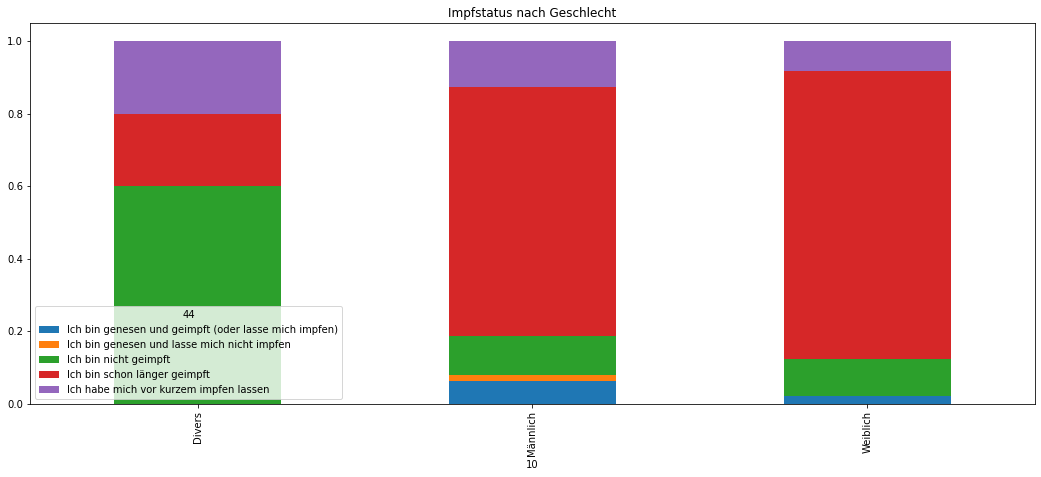

In [126]:
res1.unstack().plot(kind='bar', stacked=True,figsize=(18, 7), title='Impfstatus nach Geschlecht')

In [127]:
res2= df_new.groupby([20])[44].value_counts(normalize=True)
res2

20          44                                                  
20-30 J     Ich bin schon länger geimpft                            0.640000
            Ich bin genesen und geimpft (oder lasse mich impfen)    0.120000
            Ich bin nicht geimpft                                   0.120000
            Ich habe mich vor kurzem impfen lassen                  0.080000
            Ich bin genesen und lasse mich nicht impfen             0.040000
31 - 45 J   Ich bin schon länger geimpft                            0.615385
            Ich bin nicht geimpft                                   0.179487
            Ich habe mich vor kurzem impfen lassen                  0.179487
            Ich bin genesen und geimpft (oder lasse mich impfen)    0.025641
46 - 55 J   Ich bin schon länger geimpft                            0.651163
            Ich habe mich vor kurzem impfen lassen                  0.162791
            Ich bin nicht geimpft                                   0.139535
           

<AxesSubplot:title={'center':'Impfstatus nach Alter'}, xlabel='20'>

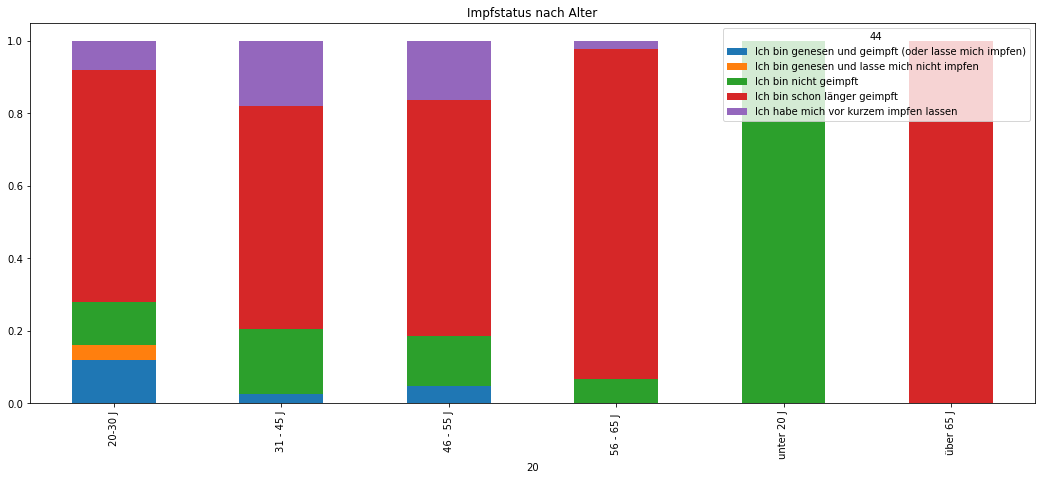

In [128]:
res2.unstack().plot(kind='bar', stacked=True,figsize=(18, 7), title='Impfstatus nach Alter')

In [129]:
res3= df_new.groupby([30])[44].value_counts(normalize=True)
res3

30                  44                                                  
Paar                Ich bin schon länger geimpft                            0.677966
                    Ich bin nicht geimpft                                   0.186441
                    Ich habe mich vor kurzem impfen lassen                  0.067797
                    Ich bin genesen und geimpft (oder lasse mich impfen)    0.050847
                    Ich bin genesen und lasse mich nicht impfen             0.016949
Paar mit Kindern    Ich bin schon länger geimpft                            0.741379
                    Ich habe mich vor kurzem impfen lassen                  0.172414
                    Ich bin nicht geimpft                                   0.068966
                    Ich bin genesen und geimpft (oder lasse mich impfen)    0.017241
Single              Ich bin schon länger geimpft                            0.861111
                    Ich bin genesen und geimpft (oder lasse mich impfen)    0

<AxesSubplot:title={'center':'Impfstatus nach Status'}, xlabel='30'>

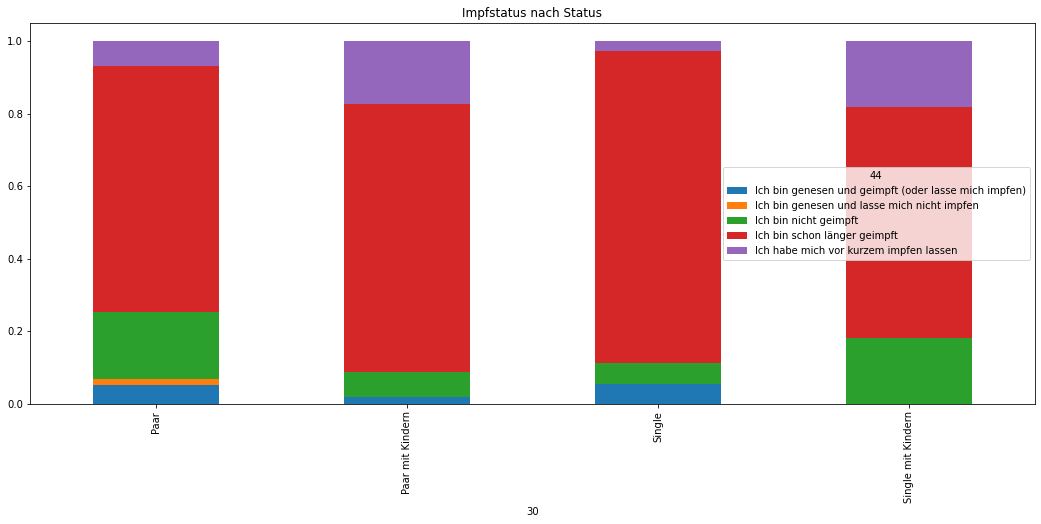

In [130]:
res3.unstack().plot(kind='bar', stacked=True,figsize=(18, 7), title='Impfstatus nach Status')